In [4]:
import numpy as np
import pandas as pd


In [9]:
#  Import the given “Data.csv”
dst_Data = pd.read_csv('C:\\data.csv')
dst_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Duration  169 non-null    int64  
 1   Pulse     169 non-null    int64  
 2   Maxpulse  169 non-null    int64  
 3   Calories  164 non-null    float64
dtypes: float64(1), int64(3)
memory usage: 5.4 KB


In [10]:
# Show the basic statistical description about the data.
dst_Data.head()

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.1
1,60,117,145,479.0
2,60,103,135,340.0
3,45,109,175,282.4
4,45,117,148,406.0


In [11]:
#Check if the data has null values.
dst_Data.isnull().any()

Duration    False
Pulse       False
Maxpulse    False
Calories     True
dtype: bool

In [12]:
#Replace the null values with the mean
column_means = dst_Data.mean()
print(column_means)
dst_Data = dst_Data. fillna(column_means)
print(dst_Data.head(20))

Duration     63.846154
Pulse       107.461538
Maxpulse    134.047337
Calories    375.790244
dtype: float64
    Duration  Pulse  Maxpulse    Calories
0         60    110       130  409.100000
1         60    117       145  479.000000
2         60    103       135  340.000000
3         45    109       175  282.400000
4         45    117       148  406.000000
5         60    102       127  300.000000
6         60    110       136  374.000000
7         45    104       134  253.300000
8         30    109       133  195.100000
9         60     98       124  269.000000
10        60    103       147  329.300000
11        60    100       120  250.700000
12        60    106       128  345.300000
13        60    104       132  379.300000
14        60     98       123  275.000000
15        60     98       120  215.200000
16        60    100       120  300.000000
17        45     90       112  375.790244
18        60    103       123  323.000000
19        45     97       125  243.000000


In [13]:
#Select at least two columns and aggregate the data using: min, max, count, mean.
output = dst_Data.agg({'Calories': ['mean', 'min','max', 'count'],'Pulse': ['mean', 'min', 'max', 'count']})
print(output)

          Calories       Pulse
mean    375.790244  107.461538
min      50.300000   80.000000
max    1860.400000  159.000000
count   169.000000  169.000000


In [14]:
#Filter the dataframe to select the rows with calories values between 500 and 1000
filter_dst_Data1=dst_Data[(dst_Data['Calories'] > 500) & (dst_Data['Calories'] < 1000)]
print(filter_dst_Data1)

     Duration  Pulse  Maxpulse  Calories
51         80    123       146     643.1
62        160    109       135     853.0
65        180     90       130     800.4
66        150    105       135     873.4
67        150    107       130     816.0
72         90    100       127     700.0
73        150     97       127     953.2
75         90     98       125     563.2
78        120    100       130     500.4
90        180    101       127     600.1
99         90     93       124     604.1
103        90     90       100     500.4
106       180     90       120     800.3
108        90     90       120     500.3


In [15]:
#Filter the dataframe to select the rows with calories values > 500 and pulse < 100.
filter_dst_Data2=dst_Data[(dst_Data['Calories'] > 500) & (dst_Data['Pulse'] < 100)]
print(filter_dst_Data2)

     Duration  Pulse  Maxpulse  Calories
65        180     90       130     800.4
70        150     97       129    1115.0
73        150     97       127     953.2
75         90     98       125     563.2
99         90     93       124     604.1
103        90     90       100     500.4
106       180     90       120     800.3
108        90     90       120     500.3


In [16]:
#Create a new “df_modified” dataframe that contains all the columns from dst_data expect for “Maxpulse”.
df_modified = dst_Data.loc[:, dst_Data.columns != 'Maxpulse']
print(df_modified)

     Duration  Pulse  Calories
0          60    110     409.1
1          60    117     479.0
2          60    103     340.0
3          45    109     282.4
4          45    117     406.0
..        ...    ...       ...
164        60    105     290.8
165        60    110     300.0
166        60    115     310.2
167        75    120     320.4
168        75    125     330.4

[169 rows x 3 columns]


In [17]:
#. Delete the “Maxpulse” column from the main dst_data dataframe
dst_Data.drop('Maxpulse', inplace=True, axis=1)
print(dst_Data.dtypes)

Duration      int64
Pulse         int64
Calories    float64
dtype: object


In [18]:
#Convert the datatype of Calories column to int datatype
dst_Data["Calories"] = dst_Data["Calories"].astype(float).astype(int)
print(dst_Data.dtypes)

Duration    int64
Pulse       int64
Calories    int32
dtype: object


Axes(0.125,0.11;0.775x0.77)


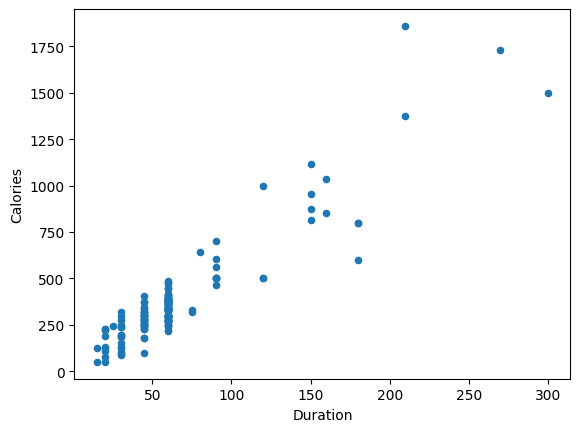

In [19]:
#Using pandas create a scatter plot for the two columns (Duration and Calories).
output = dst_Data.plot.scatter(x='Duration',y='Calories')
print(output)